In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
combined_data = pd.read_excel('data/FloatData_1hour+15min.xlsx', sheet_name='consolidated')
PST_sensor = pd.read_excel(
    'data/FloatData_1hour+15min.xlsx', sheet_name='CTD-PST',
    names=['Time Stamp', 'Pressure', 'Temperature', 'Salinity'], usecols=range(1, 5)
)
O2_sensor = pd.read_excel(
    'data/FloatData_1hour+15min.xlsx', sheet_name='O2',
    names=['Time Stamp', 'O2 Concentration'], usecols=range(1, 3)
)

In [ ]:
combined_data[combined_data['Time Stamp'] == '20250511T030700'].index
PST_sensor[PST_sensor[1] == '20250511T030700'].index

KeyError: 1

In [11]:
PST_sensor

,CTD_PTS,20250317T050201,93.03,15.499,34.7555
0,CTD_PTS,20250317T060158,95.19,15.2101,34.7603
1,CTD_PTS,20250317T070230,96.78,14.9470,34.7674
2,CTD_PTS,20250317T080302,99.81,14.7924,34.7673
3,CTD_PTS,20250317T090334,102.85,14.5695,34.7567
4,CTD_PTS,20250317T100406,98.08,14.5606,34.7586
...,...,...,...,...,...
11452,CTD_PTS,20250516T023821,17.02,29.9611,33.9754
11453,CTD_PTS,20250516T024023,12.90,30.0062,33.9760
11454,CTD_PTS,20250516T024225,8.95,30.0559,33.9762
11455,CTD_PTS,20250516T024427,5.87,30.2574,33.9789


In [14]:
driftData = combined_data[combined_data['Type'] == 'drift']

In [17]:
driftData['Time Stamp'] = pd.to_datetime(driftData['Time Stamp'], format='%Y%m%dT%H%M%S')
driftData.set_index('Time Stamp', inplace=True)

/var/folders/6v/7wcf6j0j4d9cj7n95ykzzkh80000gn/T/ipykernel_12127/3295089406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driftData['Time Stamp'] = pd.to_datetime(driftData['Time Stamp'], format='%Y%m%dT%H%M%S')


In [32]:
drift_15min = driftData[driftData.index > '2025-05-11 06:07:00']

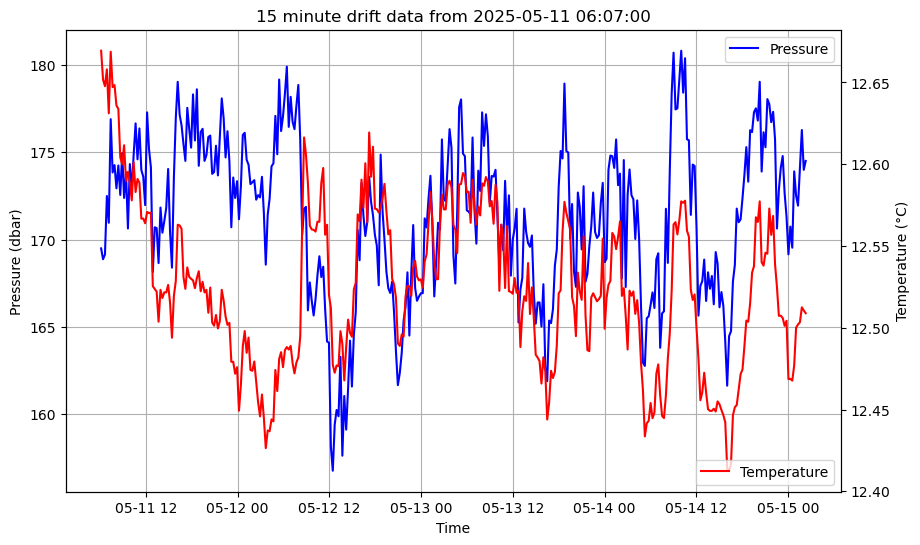

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))
ax2 = ax.twinx()
ax.plot(drift_15min.index, drift_15min['P'], label='Pressure', color='blue')
ax2.plot(drift_15min.index, drift_15min['T'], label='Temperature', color='red')
# ax.plot(drift_15min.index, drift_15min['S'], label='Salinity', color='green')
ax.set_title('15 minute drift data from 2025-05-11 06:07:00')
ax.set_xlabel('Time')
ax.set_ylabel('Pressure (dbar)')
ax2.set_ylabel('Temperature (°C)')
ax.legend()
ax2.legend(loc='lower right')
ax.grid()

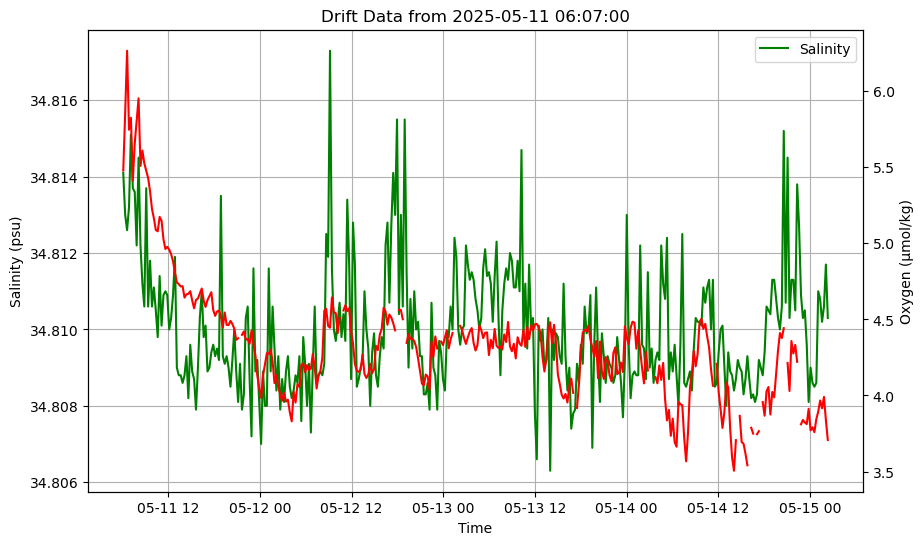

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
ax2 = ax.twinx()
#ax.plot(drift_15min.index, drift_15min['P'], label='Pressure', color='blue')
#ax2.plot(drift_15min.index, drift_15min['T'], label='Temperature', color='red')
ax.plot(drift_15min.index, drift_15min['S'], label='Salinity', color='green')
ax2.plot(drift_15min.index, drift_15min['O2'], label='Oxygen', color='red')
ax.set_title('Drift Data from 2025-05-11 06:07:00')
ax.set_xlabel('Time')
ax.set_ylabel('Salinity (psu)')
ax2.set_ylabel('Oxygen (µmol/kg)')
ax.legend()
ax.grid()

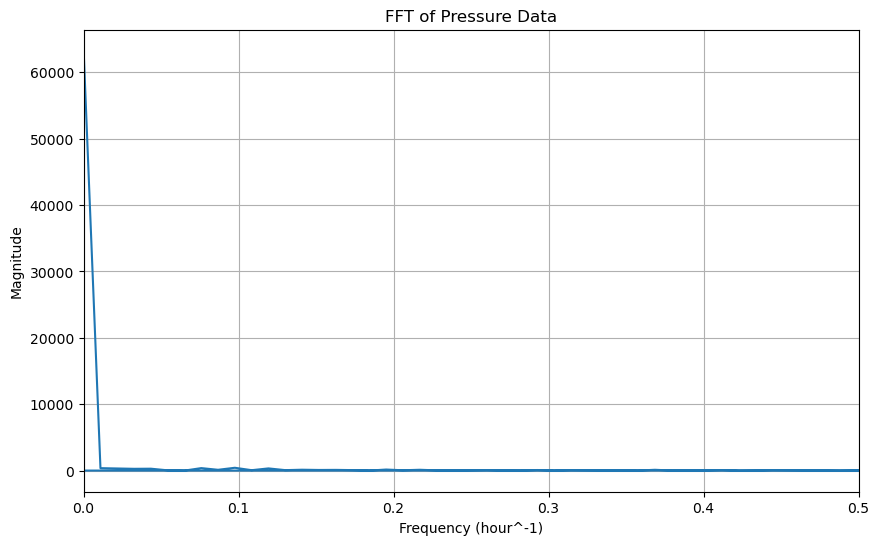

In [ ]:
fs = 4  # Sampling frequency (15 minutes = 0.25 hours = 4 samples per hour)
fourier = np.fft.fft(drift_15min['P'])
frequencies = np.fft.fftfreq(len(drift_15min['P']), d=1/fs)
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(fourier), label='FFT of Pressure')
plt.title('FFT of Pressure Data')   
plt.xlabel('Frequency (hour^-1)')
plt.ylabel('Magnitude')
plt.xlim(0, 0.5)  # Limit x-axis to positive frequencies
plt.grid()